## Fase I - Pregunta 5

Se presenta a continuación, el desarrollo de la pregunta 5 de la Fase I relacionada a la compresión de la imagen generada por la cámara mencionada en la Fase usando la descomposición matricial en vectores singulares.
Para este proceso se tomará apoyo del código usado en una sesión extra relacionada a la compresión de la imagen.

EL requerimiento es el siguiente:
Se conoce que un vehículo como el descrito puede tener una o varias cámaras incorporadas, cuya resolución de captura es de 1920 x 1080 pixeles. Si la máxima calidad con la que se pueden transmitir las imágenes a través de la red está limitada a la tercera parte de la resolución original, desarrolla un programa que sea capaz de realizar esta reducción con la menor pérdida posible. Considera el lenguaje de programación Python y la aplicación de la descomposición matricial en valores singulares.

In [29]:
import numpy as np
import matplotlib.pyplot as plt

Obteniendo la imagen generada desde github

In [30]:
import imageio.v2 as imageio
img = imageio.imread('https://raw.githubusercontent.com/janus78/MasterIA-Notebooks_Tetra3/master/FotoFaseI-Pregunta5.jpg')
img.shape

(1080, 1920, 3)

In [31]:
componentes = 1080*1920*3
print(componentes)

6220800


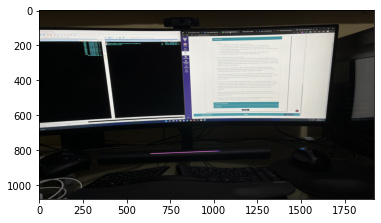

In [32]:
plt.imshow(img)
plt.show()

Definiendo el método de reconstrucción

In [33]:
def reconstruct(img, k):
    reconstructed = np.zeros(img.shape)
    for i in range(img.shape[2]):
        U, Sigma, V_transpose = np.linalg.svd(img[:, :, i])
        reconstructed[:, :, i] = U[:, :k] @ np.diag(Sigma[:k]) @ V_transpose[:k, :]
    return reconstructed

In [34]:
reconstructed = reconstruct(img, k=1)

Definiendo el método de reescalado

In [35]:
def rescale_img(img):
    rescaled = (img - img.min()) / (img.max() - img.min())
    return rescaled

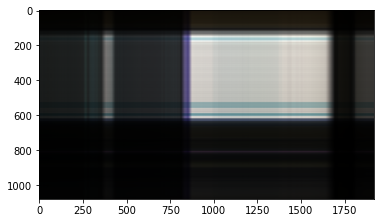

In [36]:
plt.imshow(rescale_img(reconstructed))
plt.show()

Probando otro valor de k componentes para la reconstrucción

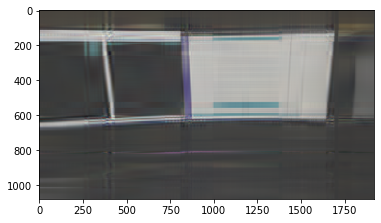

In [37]:
reconstructed = reconstruct(img, k=10)
plt.imshow(rescale_img(reconstructed))
plt.show()

Creando un mosaico de imagenes con diferente cantidad de componentes de reducción y obteniendo la imagen que sea de un tamaño 30% menor a la original

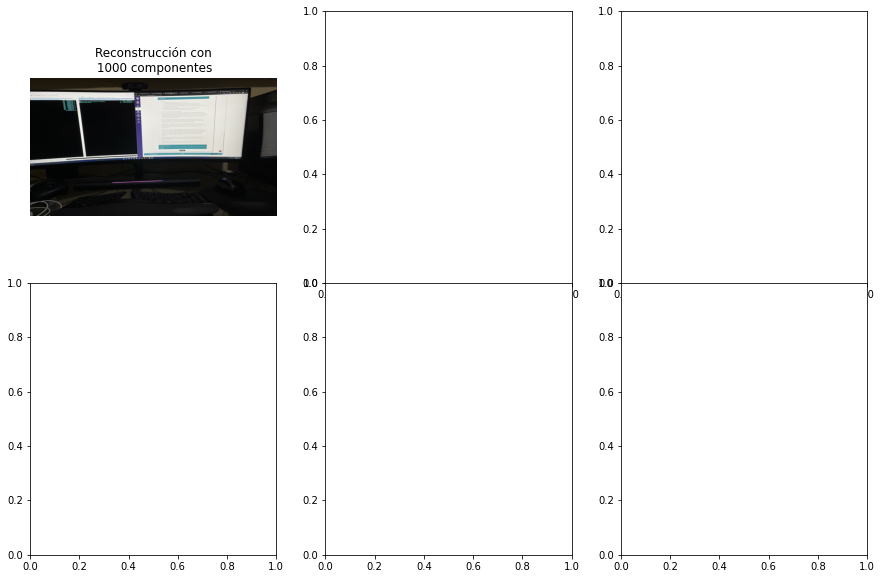

In [45]:
f, axes = plt.subplots(2, 3, figsize=(15, 10))
f.subplots_adjust(hspace=0)

n_components = [1000, 500, 200, 150, 100, 50, 25, 10, 5, 3, 2, 1]
tam_comprimido_final=0
compresion_final =0
k_final =0
count = 0
for ax, n_component in zip(axes.flatten(), n_components):
    reconstructed = reconstruct(img, k=n_component)
    a,b,c = reconstructed.shape
    tam_compresion = 50*(1 + a + b) * c #calculo de compresión tomado de https://gist.github.com/Groot90/09d07ba43939382d93e97d0dce43112b
    ratio = tam_compresion * 1.0/componentes
    compresion = round(ratio*100,2)
    ax.axis('off')
    ax.imshow(rescale_img(reconstructed))
    ax.set_title(f'Reconstrucción con\n {n_component} componentes')
    #Aqui se hace la comparación de la imagen resultante para validar que tenga un tamaño 30% menor de la imagen original
    if tam_compresion <= componentes - (componentes * 0.3):
        tam_comprimido_final = tam_compresion #SI la imagen comprimida ya es un 30% menor se guardan las variables con esos valores finales
        compresion_final = compresion
        k_final = n_component
        break
    count += 1

plt.show()

Resultados finales obtenidos en el proceso de compresión

La imagen comprimida final es



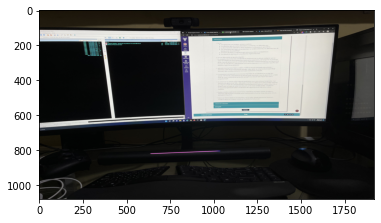

La compresión inicial es de: 6220800 bytes
El tamaño final de la imagen comprimida es de 450150 bytes
La compresión final es de 7.24%
El valor de k utilizado es 1000


In [41]:
print("La imagen comprimida final es\n")
reconstructed = reconstruct(img, k=k_final)
plt.imshow(rescale_img(reconstructed))
plt.show()
print(f"La compresión inicial es de: {componentes} bytes")
print(f"El tamaño final de la imagen comprimida es de {tam_comprimido_final} bytes")
print(f"La compresión final es de {compresion_final}%")
print(f"El valor de k utilizado es {k_final}")